In [14]:
#import data

import pybaseball as pb
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.ticker

In [4]:
#get league average OPS to make a point about the steroid era.



def get_league_ops_by_year(start_year, end_year):
    ops_by_year = []

    for year in range(start_year, end_year + 1):
        df = pb.batting_stats(year)
        # Drop rows where OBP or SLG is missing
        df = df.dropna(subset=['OBP', 'SLG'])

        # Calculate league totals (weighted by PA)
        df['PA'] = df['AB'] + df['BB'] + df['HBP'] + df['SF']  # Estimate PA
        df['OPS'] = df['OBP'] + df['SLG']

        # Weight OPS by PA to get league average
        league_ops = (df['OPS'] * df['PA']).sum() / df['PA'].sum()

        ops_by_year.append({'Year': year, 'League_OPS': league_ops})

    return pd.DataFrame(ops_by_year)

In [20]:
df_league_ops = get_league_ops_by_year(1968, 2024)

In [ ]:
df_league_ops.sort_values('League_OPS', ascending=False)


,Year,League_OPS
0,1968,0.715549
1,1969,0.768271
2,1970,0.789146
3,1971,0.756060
4,1972,0.733611
5,1973,0.758724
6,1974,0.746885
7,1975,0.753320
8,1976,0.731184
9,1977,0.787877


Text(0.5, 1.0, 'League-wide OPS:  1968 to 2024')

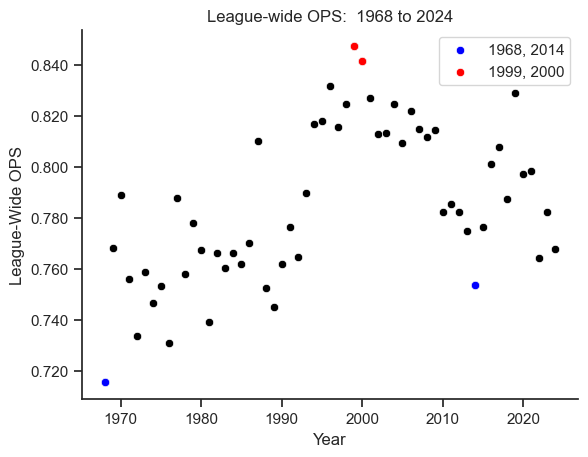

In [28]:
sns.scatterplot(data=df_league_ops, x='Year', y='League_OPS', color='black')
sns.scatterplot(data=df_league_ops[df_league_ops['Year']==1968], x='Year', y='League_OPS', color='blue', label='1968, 2014')
sns.scatterplot(data=df_league_ops[df_league_ops['Year']==2014], x='Year', y='League_OPS', color='blue')
sns.scatterplot(data=df_league_ops[df_league_ops['Year']==1999], x='Year', y='League_OPS', color='red', label='1999, 2000')
sns.scatterplot(data=df_league_ops[df_league_ops['Year']==2000], x='Year', y='League_OPS', color='red')

plt.ylabel('League-Wide OPS')
sns.set_theme(style='ticks')
sns.despine()
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.3f}'))
plt.title('League-wide OPS:  1968 to 2024')

In [3]:
df=pb.fg_pitching_data(start_season = 1996, end_season = 2004, split_seasons=True)

<Axes: xlabel='Season', ylabel='WAR'>

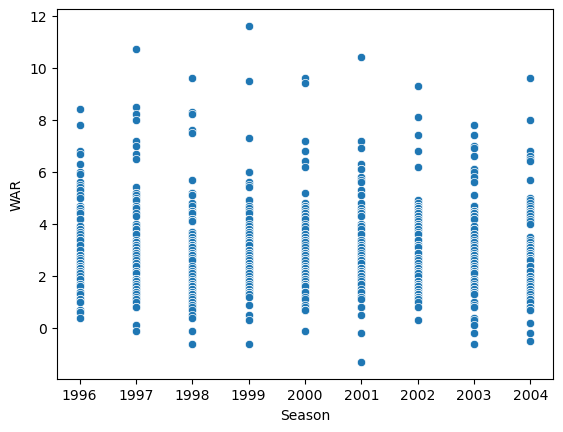

In [4]:
sns.scatterplot(data=df, y='WAR', x='Season')

In [5]:
#not very readable

#filter so that it's only 5-war seasons

df_war = df[df['WAR']>=5]

# 5 WAR is generally considered all-star quality

In [6]:
df_war.value_counts('Name')

Name
Randy Johnson     7
Mike Mussina      7
Pedro Martinez    7
Curt Schilling    6
Greg Maddux       6
Kevin Brown       6
Roger Clemens     5
John Smoltz       4
Javier Vazquez    3
Andy Pettitte     3
Jason Schmidt     2
Shane Reynolds    2
Roy Halladay      2
Roy Oswalt        2
Kevin Appier      2
Jeff Fassero      2
Tim Hudson        2
Chuck Finley      1
Andy Benes        1
Charles Nagy      1
Brad Radke        1
Ben Sheets        1
Ken Hill          1
John Burkett      1
Johan Santana     1
David Cone        1
Denny Neagle      1
Esteban Loaiza    1
Freddy Garcia     1
Jamie Moyer       1
David Wells       1
Pat Hentgen       1
Mark Mulder       1
Mark Prior        1
Kevin Millwood    1
Matt Morris       1
Scott Erickson    1
Tom Glavine       1
Name: count, dtype: int64

Text(0, 0.5, 'fWAR')

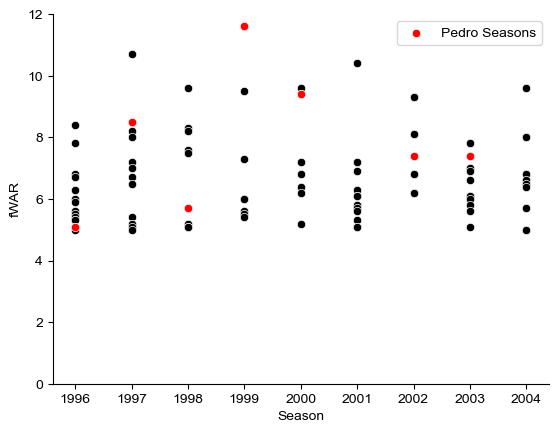

In [7]:

df_pedro_war=df_war[df_war['Name']=='Pedro Martinez']

sns.scatterplot(data=df_war, x='Season', y='WAR', color='black')
sns.scatterplot(data=df_pedro_war, x='Season', y='WAR', color='red', label='Pedro Seasons')
sns.set_theme(style='ticks')
sns.despine()
plt.ylim(0, 12)
plt.ylabel('fWAR')


In [8]:
df_b=pb.bwar_pitch()
df_b=df_b[(df_b['year_ID']>=1996)&(df_b['year_ID']<=2004)]

In [9]:
df_bwar=df_b[df_b['WAR']>=5]
df_bwar

,name_common,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,G,GS,RA,xRA,BIP,BIP_perc,salary,ERA_plus,WAR_rep,WAA,WAA_adj,WAR
33926,Kevin Appier,110293.0,appieke01,1996,KCR,1,AL,32,32,87,127.163,587.0,0.1221,5051250.0,136.920000,2.1495,3.8976,-0.1375,5.91
33961,Roger Clemens,112388.0,clemero02,1996,BOS,1,AL,34,34,106,146.135,665.0,0.1416,5500000.0,139.089796,2.4546,5.4094,-0.1578,7.71
33984,Alex Fernandez,114073.0,fernaal01,1996,CHW,1,AL,35,35,110,153.613,792.0,0.1680,4500000.0,137.688889,2.6031,3.9620,-0.1678,6.40
34010,Juan Guzmán,115267.0,guzmaju01,1996,TOR,1,AL,27,27,68,113.539,531.0,0.1157,2240000.0,171.163934,1.9006,4.9572,-0.1257,6.73
34022,Pat Hentgen,115797.0,hentgpa01,1996,TOR,1,AL,35,35,105,159.145,824.0,0.1795,2350000.0,155.511579,2.6761,6.0480,-0.1728,8.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39587,Carl Pavano,134321.0,pavanca01,2004,FLA,1,NL,31,31,80,115.844,710.0,0.1603,3800000.0,137.048649,1.8762,3.5557,-0.1538,5.28
39593,Óliver Pérez,424144.0,perezol01,2004,PIT,1,NL,30,30,71,104.221,476.0,0.1063,321000.0,143.358462,1.6604,4.1970,-0.1356,5.72
39626,Jason Schmidt,121834.0,schmija01,2004,SFG,1,NL,32,32,84,117.740,576.0,0.1224,7937500.0,136.377500,1.8985,5.0176,-0.1557,6.76
39630,Ben Sheets,282656.0,sheetbe01,2004,MIL,1,NL,34,34,85,124.872,637.0,0.1391,2425000.0,161.847887,2.0036,5.3652,-0.1640,7.20


Text(0.5, 0.98, 'Pedro Martinez Seasons in the Steroid Era')

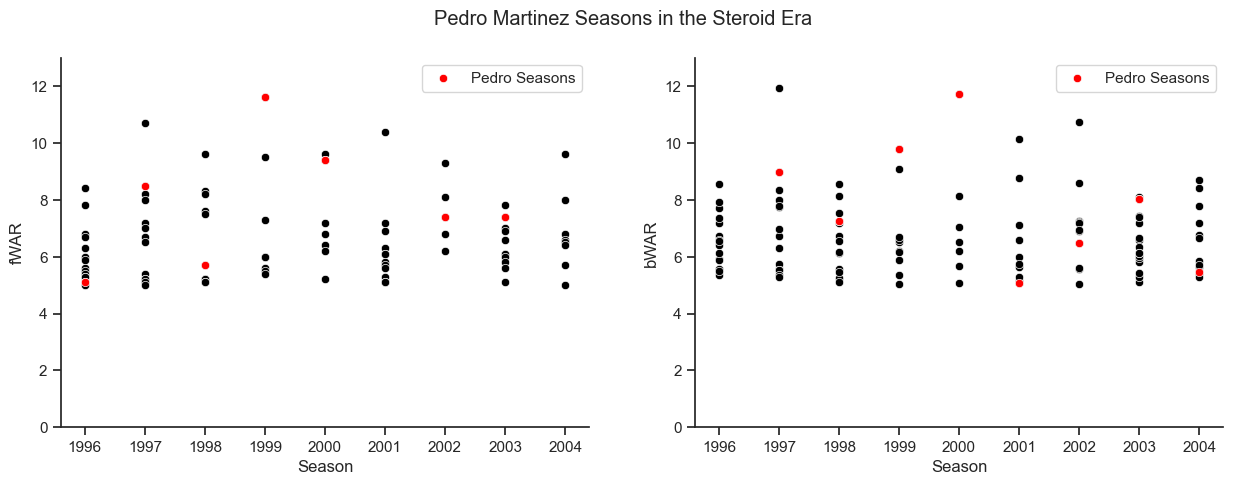

In [10]:
#collecting Pedro seasons and plotting


df_pedro_war=df_war[df_war['Name']=='Pedro Martinez']
df_pedro_bwar=df_bwar[df_bwar['name_common']=='Pedro Martinez']


fig, ax = plt.subplots(1, 2)
fig.set_figwidth(15)
sns.scatterplot(data=df_war, x='Season', y='WAR', color='black', ax=ax[0])
sns.scatterplot(data=df_pedro_war, x='Season', y='WAR', color='red', label='Pedro Seasons', ax=ax[0])
sns.set_theme(style='ticks')
sns.despine()
ax[0].set_ylabel('fWAR')
ax[0].set_ylim(0, 13)

sns.scatterplot(data=df_bwar, x='year_ID', y='WAR', color='black', ax=ax[1])
sns.scatterplot(data=df_pedro_bwar, x='year_ID', y='WAR', color='red', label='Pedro Seasons', ax=ax[1])
sns.set_theme(style='ticks')
sns.despine()
ax[1].set_ylabel('bWAR')
ax[1].set_ylim(0, 13)
ax[1].set_xlabel('Season')

fig.suptitle('Pedro Martinez Seasons in the Steroid Era')



In [18]:
#1999-2000:  clean and import



df_peak = pb.fg_pitching_data(start_season=1999, end_season=2000, league='AL')
df_peak = df_peak.loc[:, df_peak.isnull().mean() <=0.9]
df_pedro_peak = df_peak[df_peak['Name']=='Pedro Martinez']

Text(0.5, 0.98, 'Pedro Martinez in 1999 and 2000')

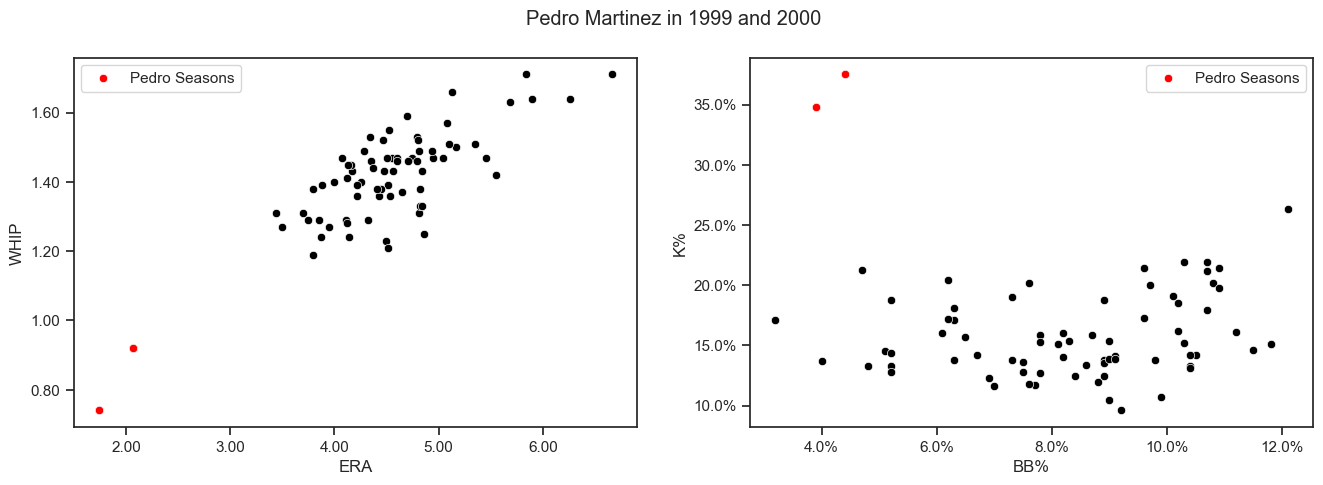

In [19]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(1, 2)
fig.set_figwidth(16)
sns.set_theme(style='ticks')
sns.scatterplot(data=df_peak, x='ERA', y='WHIP', ax=ax[0], color='black')
sns.scatterplot(data=df_pedro_peak, x='ERA', y='WHIP', ax=ax[0], color='red', label='Pedro Seasons')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.2f}'))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.2f}'))


sns.scatterplot(data=df_peak, x='BB%', y='K%', ax=ax[1], color='black')
sns.scatterplot(data=df_pedro_peak, x='BB%', y='K%', ax=ax[1], color='red', label='Pedro Seasons')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{100*x:.1f}%'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'{100*y:.1f}%'))


fig.suptitle('Pedro Martinez in 1999 and 2000')

In [35]:
df_68 = pb.pitching_stats(1968)
df_68 = df_68.loc[:, df_68.isnull().mean() <=0.9]

In [36]:
df_14 = pb.pitching_stats(2014)
df_14 = df_14.loc[:, df_14.isnull().mean() <=0.9]

Text(0.5, 0.98, 'Bob Gibson, 1968')

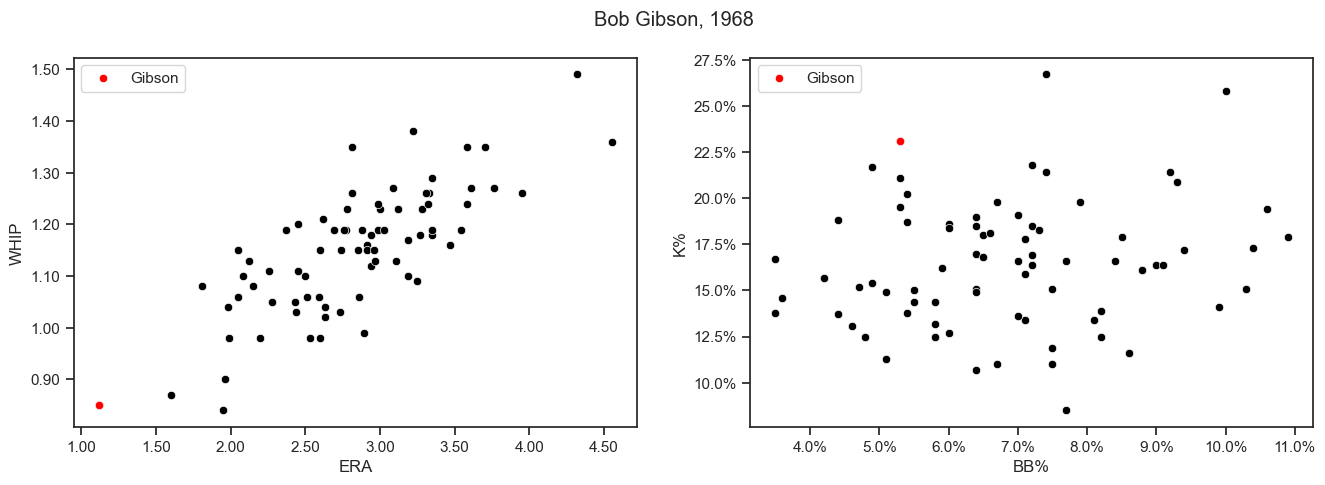

In [39]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(16)
sns.set_theme(style='ticks')
sns.scatterplot(data=df_68, x='ERA', y='WHIP', ax=ax[0], color='black')
sns.scatterplot(data=df_68[df_68['Name']=='Bob Gibson'], x='ERA', y='WHIP', ax=ax[0], color='red', label='Gibson')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.2f}'))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.2f}'))


sns.scatterplot(data=df_68, x='BB%', y='K%', ax=ax[1], color='black')
sns.scatterplot(data=df_68[df_68['Name']=='Bob Gibson'], x='BB%', y='K%', ax=ax[1], color='red', label='Gibson')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{100*x:.1f}%'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'{100*y:.1f}%'))

fig.suptitle("Bob Gibson, 1968")

Text(0.5, 0.98, 'Clayton Kershaw, 2014')

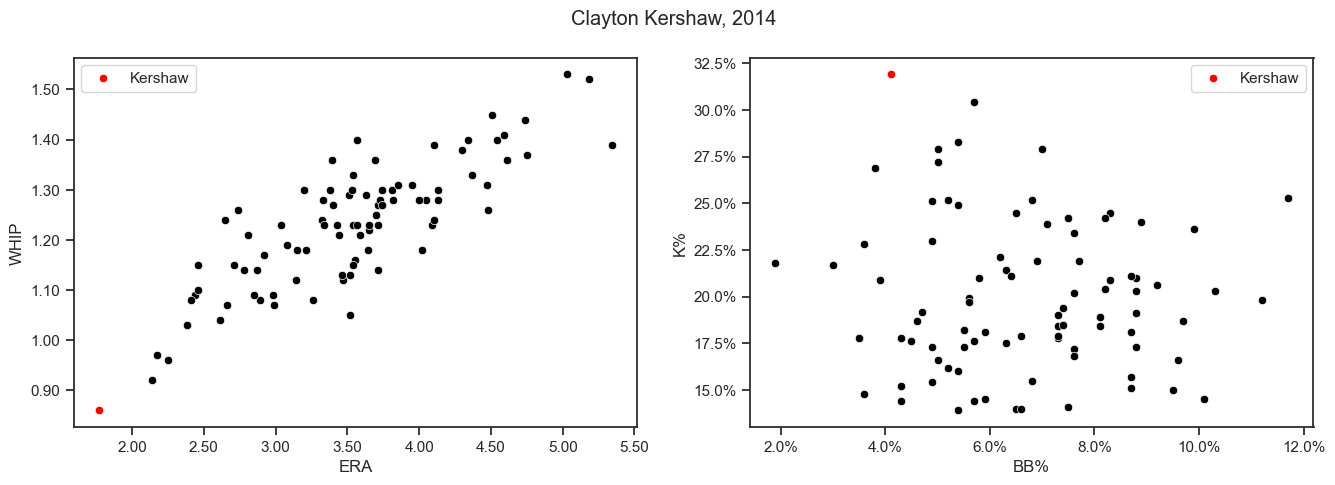

In [38]:
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(16)
sns.set_theme(style='ticks')
sns.scatterplot(data=df_14, x='ERA', y='WHIP', ax=ax[0], color='black')
sns.scatterplot(data=df_14[df_14['Name']=='Clayton Kershaw'], x='ERA', y='WHIP', ax=ax[0], color='red', label='Kershaw')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.2f}'))
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{x:.2f}'))


sns.scatterplot(data=df_14, x='BB%', y='K%', ax=ax[1], color='black')
sns.scatterplot(data=df_14[df_14['Name']=='Clayton Kershaw'], x='BB%', y='K%', ax=ax[1], color='red', label='Kershaw')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'{100*x:.1f}%'))
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'{100*y:.1f}%'))

fig.suptitle("Clayton Kershaw, 2014")